In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [229]:
raw_data = pd.read_csv("fwww.csv")

In [230]:
raw_data.head(5)

,Unnamed: 0,game_date,game_id,event,team,venue,goals,fouls,yellow_cards,red_cards,offsides,corners,saves,possession,shots,shots_on_goal
0,0,2008-06-19 07:00:00,241579,Women's International Friendly,Italy,away,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2008-06-19 07:00:00,241579,Women's International Friendly,United States,home,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2008-07-02 16:00:00,244655,Women's International Friendly,United States,away,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2008-07-02 16:00:00,244655,Women's International Friendly,Norway,home,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2008-07-05 07:00:00,247584,Women's International Friendly,United States,away,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
raw_data.isna().sum()

Unnamed: 0         0
game_date          0
game_id            0
event              0
team               0
venue              0
goals              2
fouls            276
yellow_cards     276
red_cards        276
offsides         276
corners          276
saves            276
possession       276
shots            276
shots_on_goal    276
dtype: int64

In [226]:
drop_teams=["Bolivia","Cuba","Czech Republic Women","Great Britain Women","Panama","Vietnam Women"]

for teams in drop_teams:
    data=data[data.team != teams]

In [227]:
columns_w_null=["goals","fouls","yellow_cards","red_cards","offsides","corners","saves","possession","shots",
                "shots_on_goal"]
for column in columns_w_null:
    data[column] = data.groupby("team")[column].transform(lambda x: x.fillna(x.median()))

In [228]:
data.isna().sum()

Unnamed: 0              0
game_date               0
game_id                 0
event                   0
team                    0
venue                   0
goals                   0
fouls                   0
yellow_cards            0
red_cards               0
offsides                0
corners                 0
saves                   0
possession              0
shots                   0
shots_on_goal           0
on_target_percent       0
finishes_per_attempt    0
finished_per_target     0
dtype: int64

In [232]:
def clean_data(df):
    
    drop_teams=["Bolivia","Cuba","Czech Republic Women","Great Britain Women","Panama","Vietnam Women"]

    for teams in drop_teams:
        df=df[df.team != teams]
        
    columns_w_null=["goals","fouls","yellow_cards","red_cards","offsides","corners","saves","possession","shots",
                "shots_on_goal"]
    
    for column in columns_w_null:
        df[column] = df.groupby("team")[column].transform(lambda x: x.fillna(x.median()))
     
    df["on_target_percent"]=df["shots_on_goal"]/df["shots"]
    
    df["finishes_per_attempt"]=df["goals"]/df["shots"]
    df["finished_per_target"]=df["goals"]/df["shots_on_goal"]
        
    df.replace([np.inf, -np.inf], float(0.00),inplace=True)
    df.fillna(float(0.00),inplace=True)
    
    return df


In [233]:
data=clean_data(raw_data)

In [234]:
data.drop("Unnamed: 0",axis=1)

,game_date,game_id,event,team,venue,goals,fouls,yellow_cards,red_cards,offsides,corners,saves,possession,shots,shots_on_goal,on_target_percent,finishes_per_attempt,finished_per_target
0,2008-06-19 07:00:00,241579,Women's International Friendly,Italy,away,0.0,11.0,1.0,0.0,3.0,4.0,4.0,0.520,11.0,4.0,0.363636,0.000000,0.000000
1,2008-06-19 07:00:00,241579,Women's International Friendly,United States,home,2.0,8.5,0.0,0.0,3.0,7.0,2.0,0.575,18.5,6.5,0.351351,0.108108,0.307692
2,2008-07-02 16:00:00,244655,Women's International Friendly,United States,away,4.0,8.5,0.0,0.0,3.0,7.0,2.0,0.575,18.5,6.5,0.351351,0.216216,0.615385
3,2008-07-02 16:00:00,244655,Women's International Friendly,Norway,home,0.0,8.0,0.0,0.0,1.0,4.0,3.0,0.500,9.0,3.0,0.333333,0.000000,0.000000
4,2008-07-05 07:00:00,247584,Women's International Friendly,United States,away,1.0,8.5,0.0,0.0,3.0,7.0,2.0,0.575,18.5,6.5,0.351351,0.054054,0.153846
5,2008-07-05 07:00:00,247584,Women's International Friendly,Sweden,home,0.0,11.0,0.0,0.0,2.0,6.0,2.0,0.480,9.0,3.0,0.333333,0.000000,0.000000
6,2008-07-13 07:00:00,247585,Women's International Friendly,Brazil,away,0.0,10.0,1.0,0.0,2.0,4.0,2.0,0.530,13.0,4.0,0.307692,0.000000,0.000000
7,2008-07-13 07:00:00,247585,Women's International Friendly,United States,home,1.0,8.5,0.0,0.0,3.0,7.0,2.0,0.575,18.5,6.5,0.351351,0.054054,0.153846
8,2008-08-06 09:00:00,251871,"2008 Women's Olympic Tournament, Groups",Canada,away,2.0,10.0,1.0,0.0,2.0,4.0,2.0,0.470,9.0,3.0,0.333333,0.222222,0.666667
9,2008-08-06 09:00:00,251871,"2008 Women's Olympic Tournament, Groups",Argentina,home,1.0,9.0,2.0,0.0,2.0,0.0,3.0,0.390,5.0,2.0,0.400000,0.200000,0.500000


In [235]:
data.describe()

,Unnamed: 0,game_id,goals,fouls,yellow_cards,red_cards,offsides,corners,saves,possession,shots,shots_on_goal,on_target_percent,finishes_per_attempt,finished_per_target
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,527.262956,452194.782150,1.500000,9.657869,0.871881,0.017274,2.203935,4.460173,2.943378,0.491032,11.747121,4.259117,0.368453,0.144833,0.346974
std,304.821265,80679.832138,1.716312,4.007531,0.960380,0.128499,1.717826,3.204463,2.218635,0.136557,7.029143,3.018203,0.187681,0.206636,0.423477
min,0.000000,241579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,265.250000,420057.250000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.420000,7.000000,2.000000,0.272727,0.000000,0.000000
50%,526.500000,476369.000000,1.000000,10.000000,1.000000,0.000000,2.000000,4.000000,3.000000,0.490000,11.000000,4.000000,0.333333,0.095238,0.272727
75%,787.750000,527393.750000,2.000000,12.000000,1.000000,0.000000,3.000000,6.000000,4.000000,0.560000,15.750000,6.000000,0.437500,0.200000,0.500000
max,1055.000000,540313.000000,13.000000,29.000000,6.000000,1.000000,11.000000,19.000000,14.000000,1.000000,40.000000,21.000000,1.000000,2.333333,7.000000


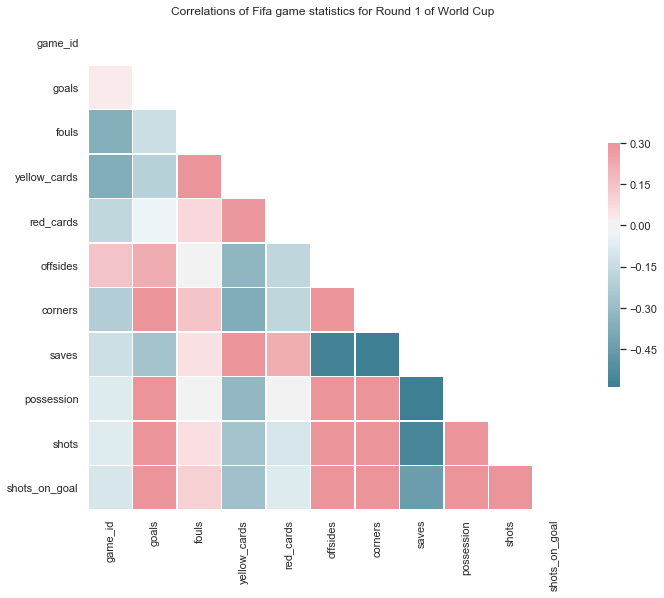

In [115]:
#graph correlations
sns.set(style="white")

d=average_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlations of Fifa game statistics for Round 1 of World Cup" )
plt.savefig("Round_1_Correlation_graph.png")

In [238]:
fwww=data[data["event"].str.contains("2019 FIFA Women's World Cup")]

In [239]:
fwww.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 868 to 927
Data columns (total 19 columns):
Unnamed: 0              60 non-null int64
game_date               60 non-null object
game_id                 60 non-null int64
event                   60 non-null object
team                    60 non-null object
venue                   60 non-null object
goals                   60 non-null float64
fouls                   60 non-null float64
yellow_cards            60 non-null float64
red_cards               60 non-null float64
offsides                60 non-null float64
corners                 60 non-null float64
saves                   60 non-null float64
possession              60 non-null float64
shots                   60 non-null float64
shots_on_goal           60 non-null float64
on_target_percent       60 non-null float64
finishes_per_attempt    60 non-null float64
finished_per_target     60 non-null float64
dtypes: float64(13), int64(2), object(4)
memory usage: 9.4+ KB


In [240]:
fwww.drop("Unnamed: 0",axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [241]:
percents=('possession',
 'on_target_percent',
 'finishes_per_attempt',
 'finished_per_target')

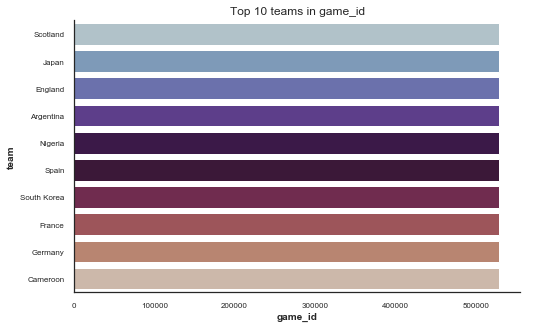

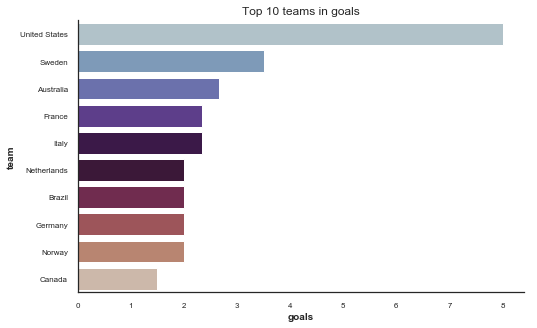

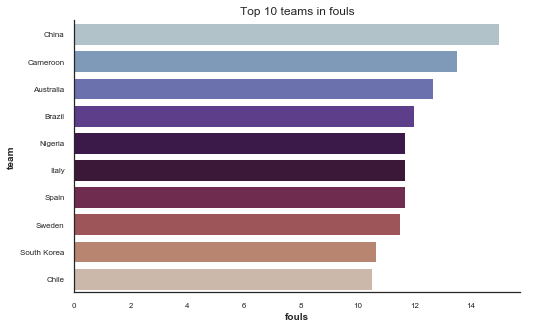

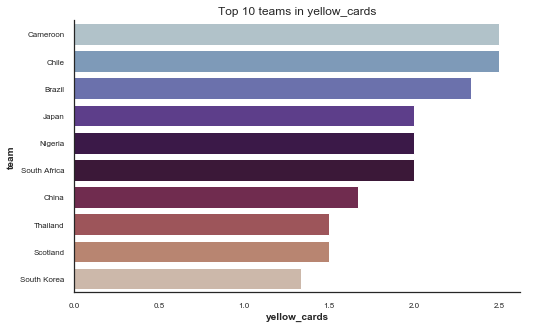

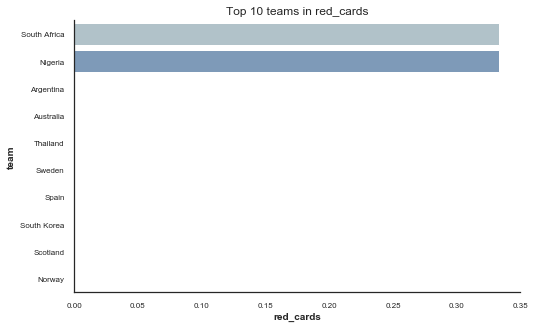

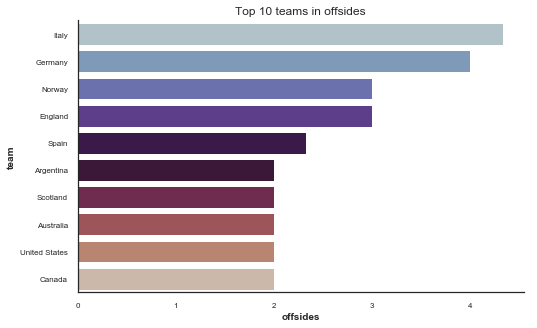

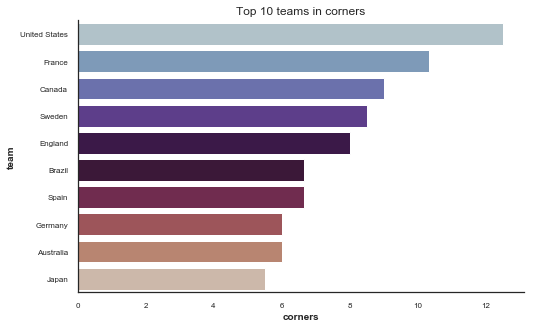

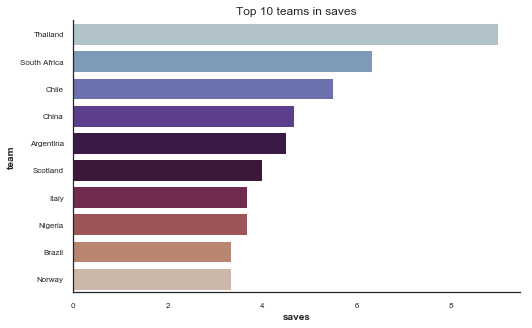

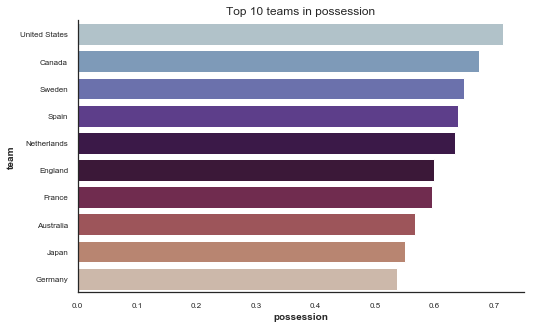

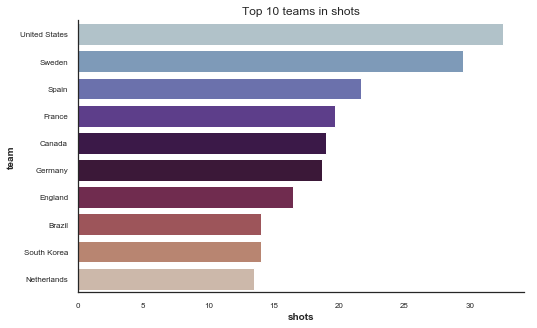

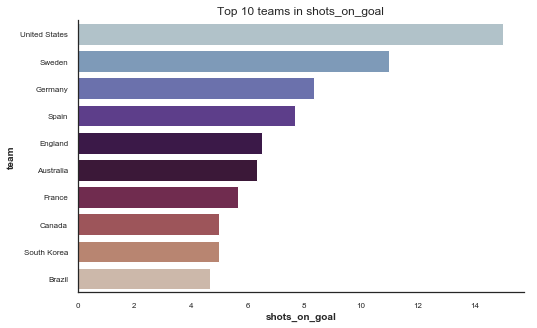

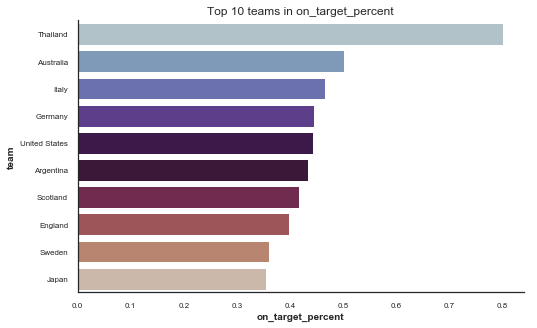

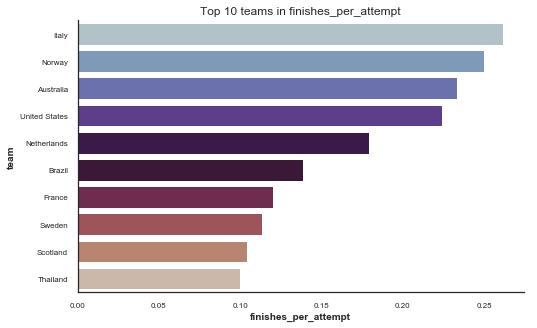

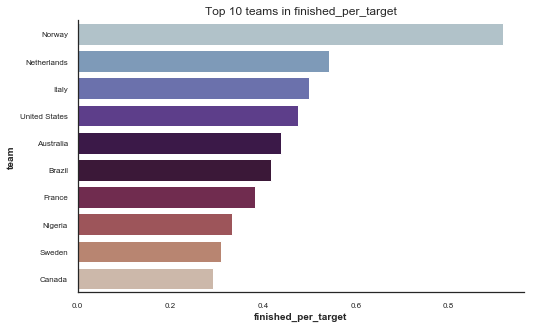

In [242]:
for variable in fwww.groupby("team").mean():
    f, ax = plt.subplots(figsize=(8, 5))
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['figure.titlesize'] = 10
    sns.barplot(fwww.groupby("team").mean().sort_values(variable,axis=0,ascending=False)[variable][:10],
                fwww.groupby("team").mean().sort_values(variable,axis=0,ascending=False).index[:10], data=average_df,
                palette="twilight")
    sns.despine()
    plt.title("Top 10 teams in " + variable)
    plt.savefig("Top_10_in_" + variable+".png")
    plt.show()

# Modeling


In [243]:
features=data[['team','possession',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]
features=pd.get_dummies(features)

In [244]:
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(features, data["goals"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [257]:
average_df=data.groupby("team").mean()
test_df=average_df[['possession',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]
test_df.reset_index(level=0, inplace=True)
test_df=pd.get_dummies(test_df)

In [258]:
test_df

,possession,on_target_percent,finishes_per_attempt,finished_per_target,corners,team_Argentina,team_Australia,team_Austria,team_Belgium,team_Brazil,...,team_South Korea,team_Spain,team_Sweden,team_Switzerland,team_Thailand,team_Trinidad and Tobago,team_United States,team_Uruguay,team_Wales,team_Zimbabwe
0,0.411667,0.420833,0.170833,0.410714,0.250000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.514375,0.377786,0.177804,0.451406,4.979167,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.355556,0.303792,0.056437,0.120370,3.222222,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.423333,0.382606,0.280093,0.472222,2.500000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.540580,0.366559,0.172064,0.450311,4.637681,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.418636,0.304812,0.052726,0.186147,4.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.479123,0.343651,0.164366,0.469862,3.929825,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.510000,0.400000,0.000000,0.000000,4.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.355263,0.357029,0.108536,0.188596,1.315789,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.461316,0.345334,0.143837,0.379924,3.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
predictions=np.round(forest.predict(test_df),0)
predictions

array([1., 2., 1., 2., 3., 1., 2., 0., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
       1., 3., 3., 0., 0., 2., 1., 2., 1., 1., 2., 0., 1., 3., 1., 1., 1.,
       2., 1., 1., 7., 1., 1., 1., 1., 1., 2., 1., 1., 2., 3., 1., 1., 2.])

In [260]:
predictions=pd.DataFrame(zip(average_df.index,predictions),columns=["team","predictions"])
predictions.head(5)

,team,predictions
0,Argentina,1.0
1,Australia,2.0
2,Austria,1.0
3,Belgium,2.0
4,Brazil,3.0


In [267]:
round_2=[["China","Spain"],["South Africa","Germany"],["Nigeria","France"],["South Korea","Norway"],
         ["Jamaica","Australia"],["Italy","Brazil"],["Japan","England"],["Scotland","Argentina"],
         ["Cameroon","New Zealand"],["Netherlands","Canada"],["Sweden","United States"],["Thailand","Chile"]]
round_2=pd.DataFrame(round_2,columns=["home","away"])

In [268]:
round_2=pd.merge(round_2, predictions,  how='left', left_on=["home"], 
         right_on = ['team']).drop("team",axis=1)
round_2=pd.merge(round_2, predictions,  how='left', left_on=["away"], 
         right_on = ['team']).drop("team",axis=1)

In [269]:
round_2

,home,away,predictions_x,predictions_y
0,China,Spain,1.0,1.0
1,South Africa,Germany,1.0,3.0
2,Nigeria,France,1.0,3.0
3,South Korea,Norway,1.0,2.0
4,Jamaica,Australia,1.0,2.0
5,Italy,Brazil,2.0,3.0
6,Japan,England,2.0,2.0
7,Scotland,Argentina,1.0,1.0
8,Cameroon,New Zealand,1.0,1.0
9,Netherlands,Canada,3.0,2.0


In [270]:
def predictor(df):
    round_2["winner"] = ""
    round_2.columns = ["home","away","home_goals","away_goals","winner"]
    
    for index,row in df.iterrows():
        if row["home_goals"] > row["away_goals"]:
            df["winner"][index] = df["home"][index]
        elif row["home_goals"] < row["away_goals"]:
            df["winner"][index] = df["away"][index]
        else:
            df["winner"][index] = "Tie"
        print(df["winner"][index]+" ("+df["home"][index]+" "+str(df["home_goals"][index])+" : "+str(df["away_goals"][index])+" "+df["away"][index]+")")
    return df

In [271]:
predictor(round_2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Tie (China 1.0 : 1.0 Spain)
Germany (South Africa 1.0 : 3.0 Germany)
France (Nigeria 1.0 : 3.0 France)
Norway (South Korea 1.0 : 2.0 Norway)
Australia (Jamaica 1.0 : 2.0 Australia)
Brazil (Italy 2.0 : 3.0 Brazil)
Tie (Japan 2.0 : 2.0 England)
Tie (Scotland 1.0 : 1.0 Argentina)
Tie (Cameroon 1.0 : 1.0 New Zealand)
Netherlands (Netherlands 3.0 : 2.0 Canada)
United States (Sweden 2.0 : 3.0 United States)
Tie (Thailand 1.0 : 1.0 Chile)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,home,away,home_goals,away_goals,winner
0,China,Spain,1.0,1.0,Tie
1,South Africa,Germany,1.0,3.0,Germany
2,Nigeria,France,1.0,3.0,France
3,South Korea,Norway,1.0,2.0,Norway
4,Jamaica,Australia,1.0,2.0,Australia
5,Italy,Brazil,2.0,3.0,Brazil
6,Japan,England,2.0,2.0,Tie
7,Scotland,Argentina,1.0,1.0,Tie
8,Cameroon,New Zealand,1.0,1.0,Tie
9,Netherlands,Canada,3.0,2.0,Netherlands
